# Code Sentinel Data Analytics Intership

## Task 1: Load and Explore a CSV File  

### What I did in this task:  
- I loaded the dataset **titanic_data.csv** into a pandas DataFrame.  
- I checked the **column names** to understand what features are available.  
- I counted the **number of rows** to see how many records the dataset contains.  
- I generated **summary statistics** (both numeric and categorical) to explore the dataset in more detail.  

### Goal:  
Get comfortable with **loading data**, **checking structure**, and **exploring basic information** before moving on to deeper analysis.  


In [1]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('titanic_data.csv')

# Print column names
print("Column names:", df.columns.tolist())

# Print number of rows
print("Number of rows:", len(df))

# Print summary statistics for all columns
print("\nSummary statistics:")
print(df.describe(include='all'))

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Number of rows: 891

Summary statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.0

## Task 2: Clean a Dataset with Missing and Categorical Data  

### What I did in this task:  
- I filled missing values in the **Age** column using the **median** age, since age is numeric and the median is less affected by outliers.  
- I filled missing values in the **Embarked** column using the **most frequent value (mode)**.  
- I dropped the **Cabin** column completely because it had too many missing values, making it less useful for analysis.  
- I converted the **Sex** column into numeric form using mapping (`male = 0`, `female = 1`).  
- I applied **one-hot encoding** to the **Embarked** column, creating new binary columns while using `drop_first=True` to avoid dummy variable trap.  
- Finally, I displayed the **first 5 rows** of the cleaned dataset to confirm the transformations.  

### Goal:  
Learn how to handle **missing values** and **categorical data** to prepare the dataset for analysis or modeling.

In [2]:

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column due to too many missing values
df = df.drop(columns=['Cabin'])

# Convert categorical columns to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Display first 5 rows
print(df.head())

# Save the cleaned dataset
df.to_csv("titanic_data_cleaned.csv", index=False)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

## Task 3: Visualize Key Insights from Data  

### What I did in this task:  
- I created a **bar plot** to show the overall survival counts, comparing how many passengers survived versus not survived.  
- I plotted a **histogram of Age** with a density curve to understand the age distribution of passengers.  
- I used a **pie chart** to show the gender distribution (male vs. female) in the dataset.  
- I created a **boxplot** of Fare by passenger class (Pclass) to compare the distribution of ticket fares across different travel classes.  
- Finally, I plotted a **bar chart of survival rate by gender** to highlight how survival chances differed between males and females.  

### Goal:  
Communicate data-driven insights visually and highlight patterns such as survival trends, age distribution, gender differences, and fare variations across classes.  


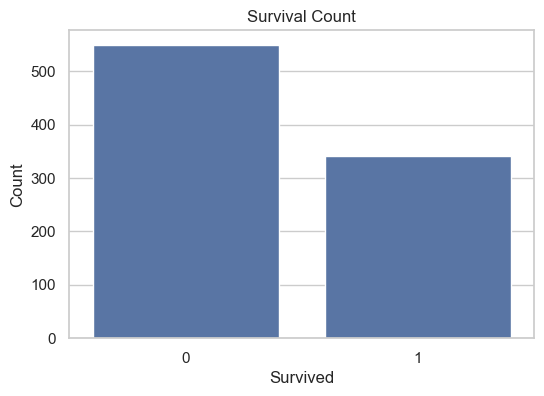

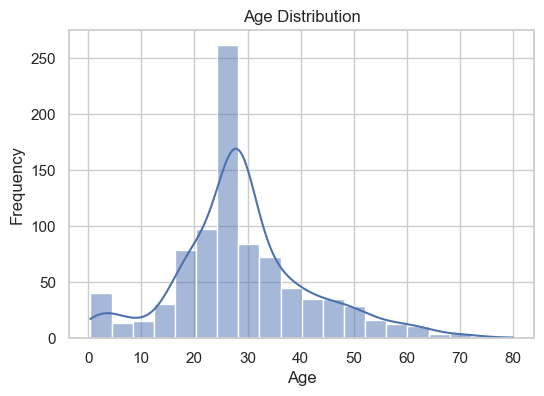

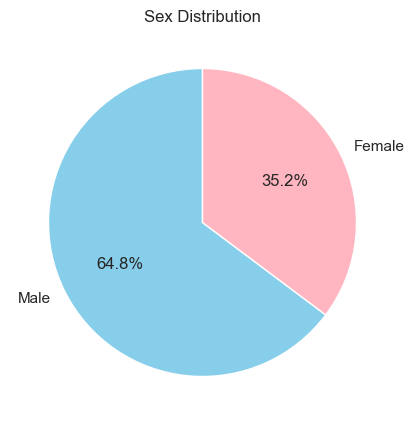

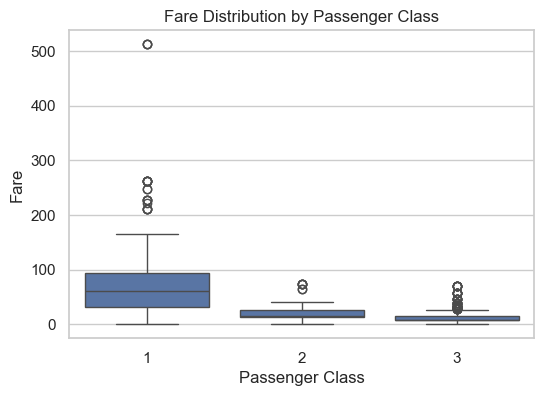

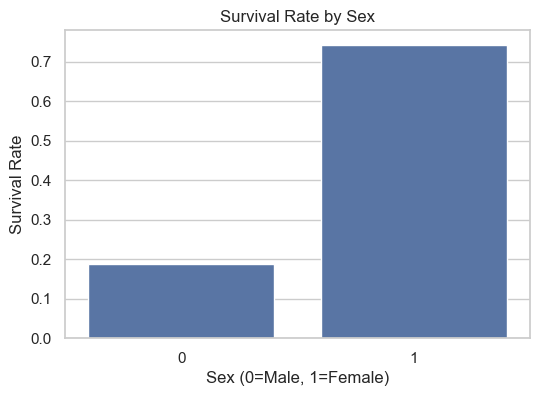

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for plots
sns.set(style="whitegrid")

# Bar plot: Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart: Sex distribution
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Sex Distribution')
plt.show()

# Boxplot: Fare by Pclass
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Survival Rate')
plt.show()